### PRÁCTICA FINAL

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import matplotlib.pyplot as plt
from numpy.random import rand, seed
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_mutual_info_score
import seaborn as sns

In [2]:
ncdb= pd.read_csv('NCDB_1999_to_2014.csv')

D:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ncdb.shape

(5860405, 22)

In [4]:
ncdb.dtypes.to_dict()

{'C_YEAR': dtype('int64'),
 'C_MNTH': dtype('O'),
 'C_WDAY': dtype('O'),
 'C_HOUR': dtype('O'),
 'C_SEV': dtype('int64'),
 'C_VEHS': dtype('O'),
 'C_CONF': dtype('O'),
 'C_RCFG': dtype('O'),
 'C_WTHR': dtype('O'),
 'C_RSUR': dtype('O'),
 'C_RALN': dtype('O'),
 'C_TRAF': dtype('O'),
 'V_ID': dtype('O'),
 'V_TYPE': dtype('O'),
 'V_YEAR': dtype('O'),
 'P_ID': dtype('O'),
 'P_SEX': dtype('O'),
 'P_AGE': dtype('O'),
 'P_PSN': dtype('O'),
 'P_ISEV': dtype('O'),
 'P_SAFE': dtype('O'),
 'P_USER': dtype('O')}

In [5]:
ncdb.isna().sum() 

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    3
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

In [6]:
#sol=[]
#for i in range(0,len(ncdb['C_VEHS'])):
 #   c=list(ncdb['C_VEHS'].isna())
  #  if c[i]== True:
   #     sol.append(i)
#print(sol)

In [7]:
ncdb.head(10)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
5,1999,1,1,17,2,03,QQ,QQ,1,2,...,01,01,1984,01,M,28,11,1,UU,1
6,1999,1,1,17,2,03,QQ,QQ,1,2,...,02,01,1991,01,M,21,11,1,UU,1
7,1999,1,1,17,2,03,QQ,QQ,1,2,...,02,01,1991,02,F,UU,13,2,UU,2
8,1999,1,1,17,2,03,QQ,QQ,1,2,...,03,01,1992,01,M,UU,11,2,UU,1
9,1999,1,1,15,2,01,04,UU,1,5,...,01,01,1997,01,M,61,11,1,UU,1


Debido a la gran cantidad de datos vamos a tomar una submuestra ya que computacionalmente no podemos trabajar con tantos datos.

In [8]:
ncdb=ncdb.sample(frac=0.10,random_state=0,axis=0)

In [9]:
ncdb.shape

(586040, 22)

In [10]:
ncdb.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
3875526,2008,11,1,13,2,2,UU,02,2,3,...,1,01,1997,01,M,73,11,1,UU,1
5184676,2012,10,6,12,2,1,06,02,3,2,...,01,01,1999,01,M,17,11,2,02,1
5109095,2012,8,2,00,2,1,04,01,1,1,...,01,01,1999,01,M,33,11,2,02,1
4268397,2010,01,2,10,2,02,21,02,1,2,...,1,01,2005,01,M,50,11,1,02,1
4655495,2011,3,2,02,2,2,06,01,1,1,...,1,01,2009,02,M,36,13,1,02,2


In [11]:
ncdb.reset_index(drop=True,inplace=True)

In [12]:
ncdb.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2008,11,1,13,2,2,UU,02,2,3,...,1,01,1997,01,M,73,11,1,UU,1
1,2012,10,6,12,2,1,06,02,3,2,...,01,01,1999,01,M,17,11,2,02,1
2,2012,8,2,00,2,1,04,01,1,1,...,01,01,1999,01,M,33,11,2,02,1
3,2010,01,2,10,2,02,21,02,1,2,...,1,01,2005,01,M,50,11,1,02,1
4,2011,3,2,02,2,2,06,01,1,1,...,1,01,2009,02,M,36,13,1,02,2


In [13]:
ncdb.isna().sum() 

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

Observamos como son las variables, en en enlace de kaggle el usuario que proporcionó los datos comentó que hay variables que toman las cifras 01 y 1, siendo el mismo valor, al igual que hay números tomados como string y otros como enteros. Por consiguiente, analizaremos los valores de cada una de las variables y modificaremos alguno de los valores para que se pueda ajustar mejor a los modelos predictivos.

In [14]:
ncdb['C_YEAR'].value_counts()

2000    41841
2002    41796
1999    41507
2003    40910
2001    40878
2004    38910
2005    38720
2006    37810
2007    36778
2008    33833
2010    33587
2009    33411
2011    32822
2012    32100
2013    31502
2014    29635
Name: C_YEAR, dtype: int64

In [15]:
ncdb['C_MNTH'].value_counts(normalize=True)

8     0.093200
7     0.091514
6     0.088958
10    0.087927
9     0.087760
11    0.084388
5     0.080198
3     0.071461
2     0.070422
4     0.066948
12    0.047447
01    0.043985
12    0.042637
1     0.041166
02    0.001578
11    0.000346
UU    0.000063
Name: C_MNTH, dtype: float64

In [16]:
for i in list(range(0,10)):
    ncdb.loc[ncdb['C_MNTH']==f'0{i}', 'C_MNTH']=i

In [17]:
ncdb['C_MNTH'].value_counts(normalize=True)

8     0.093200
7     0.091514
6     0.088958
10    0.087927
9     0.087760
1     0.085151
11    0.084388
5     0.080198
2     0.072000
3     0.071461
4     0.066948
12    0.047447
12    0.042637
11    0.000346
UU    0.000063
Name: C_MNTH, dtype: float64

In [18]:
ncdb['C_WDAY'].value_counts(normalize=True)

5    0.087897
5    0.082902
6    0.078196
4    0.075022
4    0.073440
1    0.071816
3    0.071256
2    0.070345
6    0.069915
2    0.069577
3    0.069038
7    0.066473
1    0.060187
7    0.053723
U    0.000212
Name: C_WDAY, dtype: float64

In [19]:
for i in list(range(0,8)):
    ncdb.loc[ncdb['C_WDAY']==f'{i}', 'C_WDAY']=i

In [20]:
ncdb['C_WDAY'].value_counts(normalize=True)

5    0.170799
4    0.148463
6    0.148111
3    0.140294
2    0.139922
1    0.132003
7    0.120197
U    0.000212
Name: C_WDAY, dtype: float64

In [21]:
ncdb['C_HOUR'].value_counts(normalize=True)

16    0.088368
17    0.085177
15    0.084172
14    0.067949
18    0.063915
13    0.062733
12    0.062474
08    0.051822
11    0.051408
19    0.048319
10    0.042323
09    0.038680
20    0.037332
07    0.035535
21    0.035194
22    0.028377
23    0.022033
06    0.017896
00    0.015001
02    0.013233
01    0.012687
03    0.010979
UU    0.010062
05    0.007764
04    0.006568
Name: C_HOUR, dtype: float64

In [22]:
ncdb['C_SEV'].value_counts(normalize=True)

2    0.982836
1    0.017164
Name: C_SEV, dtype: float64

In [23]:
ncdb['C_VEHS'].value_counts(normalize=True).head(20)

2     0.323065
02    0.293466
1     0.113369
01    0.100128
3     0.065869
03    0.059982
4     0.016623
04    0.014531
5     0.003833
05    0.003583
6     0.001339
06    0.001056
7     0.000517
07    0.000457
8     0.000258
10    0.000181
08    0.000181
09    0.000159
9     0.000154
UU    0.000094
Name: C_VEHS, dtype: float64

In [24]:
for i in list(range(0,10)):
    ncdb.loc[ncdb['C_VEHS']==f'0{i}', 'C_VEHS']=i

In [25]:
ncdb['C_VEHS'].value_counts(normalize=True).head(60)

2     0.616531
1     0.213497
3     0.125851
4     0.031155
5     0.007416
6     0.002396
7     0.000974
8     0.000439
9     0.000312
10    0.000181
UU    0.000094
12    0.000085
11    0.000078
11    0.000070
10    0.000067
14    0.000051
36    0.000049
14    0.000043
13    0.000041
15    0.000039
15    0.000039
20    0.000032
13    0.000027
12    0.000024
16    0.000024
18    0.000022
35    0.000020
44    0.000020
16    0.000020
72    0.000019
22    0.000017
54    0.000017
17    0.000017
71    0.000017
24    0.000015
77    0.000014
58    0.000014
21    0.000014
19    0.000012
38    0.000012
43    0.000012
51    0.000012
38    0.000012
27    0.000012
77    0.000012
17    0.000012
37    0.000010
28    0.000010
26    0.000009
31    0.000009
25    0.000009
18    0.000009
39    0.000009
41    0.000009
57    0.000009
19    0.000007
30    0.000007
56    0.000007
29    0.000007
20    0.000005
Name: C_VEHS, dtype: float64

Observamos que en este caso exiten dos valores de 11, de 10.. debido a que son cifras de distinto tipo.En la siguiente celda definiremos dichos valores como enteros.

In [26]:
for i in list(range(10,100)):
    ncdb.loc[ncdb['C_VEHS']==f'{i}', 'C_VEHS']=i

In [27]:
ncdb['C_VEHS'].value_counts(normalize=True)

2     0.616531
1     0.213497
3     0.125851
4     0.031155
5     0.007416
6     0.002396
7     0.000974
8     0.000439
9     0.000312
10    0.000247
11    0.000148
12    0.000109
14    0.000094
UU    0.000094
15    0.000078
13    0.000068
36    0.000049
16    0.000044
20    0.000038
18    0.000031
17    0.000029
77    0.000026
38    0.000024
22    0.000022
44    0.000020
35    0.000020
21    0.000019
72    0.000019
19    0.000019
24    0.000019
71    0.000017
54    0.000017
27    0.000017
58    0.000014
26    0.000014
43    0.000012
51    0.000012
28    0.000010
25    0.000010
37    0.000010
39    0.000009
31    0.000009
41    0.000009
57    0.000009
29    0.000007
30    0.000007
56    0.000007
40    0.000005
46    0.000005
23    0.000003
33    0.000003
32    0.000003
34    0.000002
Name: C_VEHS, dtype: float64

In [28]:
ncdb['C_CONF'].value_counts(normalize=True)

21    0.301751
35    0.148077
06    0.087927
36    0.073722
33    0.072010
QQ    0.048364
04    0.036791
22    0.034039
31    0.033694
02    0.031494
UU    0.030363
03    0.028435
01    0.015902
41    0.013567
23    0.011984
34    0.010631
24    0.008902
32    0.008086
05    0.002305
25    0.001955
Name: C_CONF, dtype: float64

En la variable `C_CONF` tomaremos el valor 'QQ' como el número 45, indicando que los objetos implicados en la colisión son otros distintos a los considerados por el estado de Canada.

In [29]:
ncdb.loc[ncdb['C_CONF']=='QQ', 'C_CONF']=45

In [30]:
ncdb['C_CONF'].value_counts(normalize=True)

21    0.301751
35    0.148077
06    0.087927
36    0.073722
33    0.072010
45    0.048364
04    0.036791
22    0.034039
31    0.033694
02    0.031494
UU    0.030363
03    0.028435
01    0.015902
41    0.013567
23    0.011984
34    0.010631
24    0.008902
32    0.008086
05    0.002305
25    0.001955
Name: C_CONF, dtype: float64

In [31]:
ncdb['C_RCFG'].value_counts(normalize=True)

02    0.467656
01    0.355989
UU    0.086223
03    0.049509
QQ    0.024488
05    0.008482
04    0.004107
08    0.001964
06    0.001008
09    0.000317
07    0.000159
10    0.000097
Name: C_RCFG, dtype: float64

Definiremos el valor de 'QQ' como 13 en la variable `C_RCFG` , indicando que es un escenario distinto a los conemplados.

In [32]:
ncdb.loc[ncdb['C_RCFG']=='QQ', 'C_RCFG']=13

In [33]:
ncdb['C_RCFG'].value_counts(normalize=True)

02    0.467656
01    0.355989
UU    0.086223
03    0.049509
13    0.024488
05    0.008482
04    0.004107
08    0.001964
06    0.001008
09    0.000317
07    0.000159
10    0.000097
Name: C_RCFG, dtype: float64

In [34]:
ncdb['C_WTHR'].value_counts(normalize=True)

1    0.694453
2    0.102833
3    0.102331
4    0.060996
U    0.015066
6    0.013895
5    0.005250
Q    0.002612
7    0.002565
Name: C_WTHR, dtype: float64

Este caso es el mismo que los anteriores y definiremos 'Q' con el valor 8.

In [35]:
ncdb.loc[ncdb['C_WTHR']=='Q', 'C_WTHR']=8

In [36]:
ncdb['C_WTHR'].value_counts(normalize=True)

1    0.694453
2    0.102833
3    0.102331
4    0.060996
U    0.015066
6    0.013895
5    0.005250
8    0.002612
7    0.002565
Name: C_WTHR, dtype: float64

In [37]:
ncdb['C_RSUR'].value_counts(normalize=True)

1    0.656221
2    0.184498
5    0.054392
3    0.044381
Q    0.029010
U    0.013475
4    0.012313
6    0.004430
7    0.001027
8    0.000203
9    0.000049
Name: C_RSUR, dtype: float64

Aqui 'Q' tomará el valor 10:

In [38]:
ncdb.loc[ncdb['C_RSUR']=='Q', 'C_RSUR']=10

In [39]:
ncdb['C_RSUR'].value_counts(normalize=True)

1     0.656221
2     0.184498
5     0.054392
3     0.044381
10    0.029010
U     0.013475
4     0.012313
6     0.004430
7     0.001027
8     0.000203
9     0.000049
Name: C_RSUR, dtype: float64

In [40]:
ncdb['C_RALN'].value_counts(normalize=True)

1    0.710496
2    0.100070
U    0.073720
3    0.061465
4    0.038286
5    0.006414
Q    0.004971
6    0.004578
Name: C_RALN, dtype: float64

En esta variable, 'Q' tomará el valor más alto que sería 7.

In [41]:
ncdb.loc[ncdb['C_RALN']=='Q', 'C_RALN']=7

In [42]:
ncdb['C_RALN'].value_counts(normalize=True)

1    0.710496
2    0.100070
U    0.073720
3    0.061465
4    0.038286
5    0.006414
7    0.004971
6    0.004578
Name: C_RALN, dtype: float64

In [43]:
ncdb['C_TRAF'].value_counts(normalize=True)

18    0.524230
01    0.277681
03    0.110696
UU    0.038137
04    0.015153
QQ    0.013830
06    0.007675
08    0.004280
02    0.003283
13    0.000737
05    0.000676
17    0.000667
15    0.000654
11    0.000618
12    0.000543
10    0.000497
07    0.000415
16    0.000142
09    0.000089
Name: C_TRAF, dtype: float64

En este caso definiremos 'QQ' con el valor 19:

In [44]:
ncdb.loc[ncdb['C_TRAF']=='QQ', 'C_TRAF']=19

In [45]:
ncdb['C_TRAF'].value_counts(normalize=True)

18    0.524230
01    0.277681
03    0.110696
UU    0.038137
04    0.015153
19    0.013830
06    0.007675
08    0.004280
02    0.003283
13    0.000737
05    0.000676
17    0.000667
15    0.000654
11    0.000618
12    0.000543
10    0.000497
07    0.000415
16    0.000142
09    0.000089
Name: C_TRAF, dtype: float64

In [46]:
ncdb['V_ID'].value_counts(normalize=True)

01    0.341325
02    0.237402
1     0.189001
2     0.129722
03    0.032728
        ...   
52    0.000002
32    0.000002
47    0.000002
42    0.000002
22    0.000002
Name: V_ID, Length: 97, dtype: float64

Analizando la variable `V_ID` toman valores 01, 02, 03... además de 1, 2, 3... en consecuencia los definimos todos como enteros:

In [47]:
for i in list(range(0,10)):
    ncdb.loc[ncdb['V_ID']==f'0{i}', 'V_ID']=i

In [48]:
ncdb['V_ID'].value_counts(normalize=True)

1     0.530326
2     0.367123
3     0.050961
99    0.023423
99    0.014252
        ...   
52    0.000002
47    0.000002
42    0.000002
36    0.000002
22    0.000002
Name: V_ID, Length: 88, dtype: float64

Esta variable sigue tomando los mismos valores como si fuesen distintos (véase el caso del 99), en consecuencia redifiniremos dichos valores para que sean del mismo tipo:

In [49]:
for i in list(range(10,100)):
    ncdb.loc[ncdb['V_ID']==f'{i}', 'V_ID']=i

In [50]:
ncdb['V_ID'].value_counts(normalize=True).head(60)

1     0.530326
2     0.367123
3     0.050961
99    0.037675
4     0.009839
5     0.002169
6     0.000722
7     0.000302
8     0.000167
9     0.000106
UU    0.000075
10    0.000068
11    0.000053
13    0.000044
12    0.000039
14    0.000031
16    0.000031
18    0.000020
19    0.000020
15    0.000015
17    0.000015
20    0.000015
24    0.000014
26    0.000010
41    0.000010
23    0.000009
30    0.000009
29    0.000009
48    0.000009
27    0.000007
34    0.000007
35    0.000007
22    0.000007
32    0.000007
37    0.000007
31    0.000005
47    0.000005
28    0.000005
56    0.000005
36    0.000005
59    0.000005
42    0.000003
45    0.000003
33    0.000003
54    0.000003
52    0.000003
21    0.000003
71    0.000002
76    0.000002
60    0.000002
86    0.000002
51    0.000002
53    0.000002
50    0.000002
38    0.000002
39    0.000002
40    0.000002
44    0.000002
49    0.000002
25    0.000002
Name: V_ID, dtype: float64

In [51]:
ncdb['V_TYPE'].value_counts(normalize=True)

01    0.822673
NN    0.039124
06    0.029976
17    0.021186
14    0.021174
07    0.015142
08    0.011986
05    0.011416
11    0.008772
UU    0.005165
QQ    0.004348
09    0.003687
16    0.001647
20    0.001292
22    0.000783
18    0.000572
23    0.000503
19    0.000295
10    0.000130
21    0.000130
Name: V_TYPE, dtype: float64

La variable `V_TYPE` hace referencia al tipo de vehículo, en consecuencia han creado una variable denominada 'NN' indicando que es un elemento que no se ajusta a la variable, es decir no es un tipo de coche sino que por ejemplo indica que es un peatón. Para considerar este valor sin que sea un string lo definiremos con el valor 00, indicando que no es un vehículo.

En cuanto al valor 'QQ' tomará el valor 24, ya que es un vehículo pero no corresponde con las características de los distintos tipos que han considerado.

In [52]:
ncdb.loc[ncdb['V_TYPE']=='NN', 'V_TYPE']= 00
ncdb.loc[ncdb['V_TYPE']=='QQ', 'V_TYPE']= 24

In [53]:
ncdb['V_TYPE'].value_counts(normalize=True)

01    0.822673
0     0.039124
06    0.029976
17    0.021186
14    0.021174
07    0.015142
08    0.011986
05    0.011416
11    0.008772
UU    0.005165
24    0.004348
09    0.003687
16    0.001647
20    0.001292
22    0.000783
18    0.000572
23    0.000503
19    0.000295
10    0.000130
21    0.000130
Name: V_TYPE, dtype: float64

In [54]:
ncdb['V_YEAR'].value_counts(normalize=True).head(60)

2000    0.055636
UUUU    0.055484
2002    0.049846
1998    0.049758
1999    0.048879
2003    0.047667
2001    0.047620
1997    0.044924
NNNN    0.044674
2004    0.038948
1995    0.038571
2005    0.038562
1996    0.033810
1994    0.033066
2006    0.033049
1992    0.032726
1993    0.031703
2007    0.031334
1991    0.029058
1990    0.027196
2008    0.025053
1989    0.023891
1988    0.020755
2009    0.018023
2010    0.015388
1987    0.014118
1986    0.012079
2011    0.010951
2012    0.008639
1985    0.007878
2013    0.006012
1984    0.005411
1983    0.003179
1981    0.003010
1982    0.002394
2014    0.002327
1980    0.001908
1979    0.001524
1978    0.001066
1977    0.000776
1976    0.000512
1975    0.000384
1974    0.000254
1973    0.000253
1972    0.000249
2015    0.000205
1970    0.000171
1971    0.000167
1969    0.000148
1968    0.000118
1967    0.000109
1966    0.000089
1964    0.000055
1965    0.000051
1963    0.000029
1962    0.000027
1957    0.000024
1939    0.000022
1956    0.0000

Como el valor 'NNNN' indica que el año no procede, lo tomaremos como 0000:

In [55]:
ncdb.loc[ncdb['V_YEAR']=='NNNN', 'V_YEAR']= 0000

In [56]:
ncdb['P_ID'].value_counts(normalize=True).head(50)

01    0.711829
02    0.193854
03    0.057720
04    0.022471
05    0.007209
06    0.001932
NN    0.001758
07    0.000857
08    0.000391
09    0.000270
10    0.000205
11    0.000181
12    0.000148
13    0.000121
14    0.000092
17    0.000077
21    0.000067
16    0.000067
15    0.000063
18    0.000058
20    0.000053
23    0.000044
19    0.000043
30    0.000041
25    0.000041
22    0.000038
29    0.000036
34    0.000027
27    0.000027
31    0.000026
26    0.000022
32    0.000020
24    0.000019
37    0.000017
33    0.000017
28    0.000017
38    0.000015
35    0.000015
36    0.000010
42    0.000009
39    0.000009
51    0.000009
44    0.000007
43    0.000007
45    0.000005
UU    0.000005
41    0.000005
60    0.000005
49    0.000005
40    0.000005
Name: P_ID, dtype: float64

En este caso tomaremos los valores 'NN' como 00 ya que es un elemento que no esta acorde con la variable `P_ID` que corresponde con la identificación de personas,por ejemplo, toman el valor 'NN' los coches que están aparcados.

In [57]:
ncdb.loc[ncdb['P_ID']=='NN', 'P_ID']= 00

In [58]:
ncdb['P_ID'].value_counts(normalize=True)

01    0.711829
02    0.193854
03    0.057720
04    0.022471
05    0.007209
        ...   
55    0.000002
57    0.000002
62    0.000002
53    0.000002
79    0.000002
Name: P_ID, Length: 64, dtype: float64

In [59]:
ncdb['P_SEX'].value_counts(normalize=True)

M    0.541209
F    0.416007
U    0.040383
N    0.002401
Name: P_SEX, dtype: float64

En este caso la variable `P_SEX` que hace referencia al sexo, no modificaremos sus valores sino que aplicaremos antes la función 'OneHotEncoder' ya que es un método más efectivo, que hacer una nueva escala para dichos elementos.

In [60]:
#ncdb.loc[ncdb['P_SEX']=='N', 'P_SEX']= 0
#ncdb.loc[ncdb['P_SEX']=='U', 'P_SEX']= np.nan
#ncdb.loc[ncdb['P_SEX']=='M', 'P_SEX']= 1
#ncdb.loc[ncdb['P_SEX']=='F', 'P_SEX']=2

In [61]:
import category_encoders as ce
ohe = ce.OneHotEncoder(cols=ncdb[['P_SEX']])
model = ohe.fit(ncdb)
ncdb= model.transform(ncdb)

In [62]:
ncdb.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX_1', 'P_SEX_2', 'P_SEX_3', 'P_SEX_4', 'P_AGE',
       'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'],
      dtype='object')

In [63]:
ncdb['P_AGE'].value_counts(normalize=True).head(30)

UU    0.064851
18    0.029356
19    0.028317
20    0.027450
17    0.027211
21    0.025131
22    0.023553
23    0.022309
24    0.020768
25    0.020072
26    0.018922
27    0.017946
28    0.017415
30    0.017071
40    0.016859
29    0.016704
16    0.016642
42    0.016361
39    0.016347
37    0.016091
35    0.016074
43    0.015932
41    0.015927
38    0.015910
44    0.015910
33    0.015907
32    0.015902
34    0.015900
31    0.015818
45    0.015763
Name: P_AGE, dtype: float64

En este caso tomaremos el valor 'NN' como 111, ya que el valor 99 indica que tienen 99 años o más y el valor 00 que tiene menos de un año.

In [64]:
ncdb.loc[ncdb['P_AGE']=='NN', 'P_AGE']= 111

In [65]:
ncdb['P_PSN'].value_counts(normalize=True)

11    0.669790
13    0.151087
23    0.044180
21    0.036880
99    0.035871
22    0.015267
12    0.014895
UU    0.009824
96    0.007539
32    0.005051
QQ    0.004399
NN    0.002281
98    0.001164
33    0.000978
31    0.000763
97    0.000032
Name: P_PSN, dtype: float64

In [66]:
ncdb.loc[ncdb['P_PSN']=='NN', 'P_PSN']= 00
ncdb.loc[ncdb['P_PSN']=='QQ', 'P_PSN']= 100 

In [67]:
ncdb['P_PSN'].value_counts(normalize=True)

11     0.669790
13     0.151087
23     0.044180
21     0.036880
99     0.035871
22     0.015267
12     0.014895
UU     0.009824
96     0.007539
32     0.005051
100    0.004399
0      0.002281
98     0.001164
33     0.000978
31     0.000763
97     0.000032
Name: P_PSN, dtype: float64

In [68]:
ncdb['P_ISEV'].value_counts(normalize=True)

2    0.524734
1    0.404727
N    0.049717
U    0.013811
3    0.007011
Name: P_ISEV, dtype: float64

In [69]:
ncdb.loc[ncdb['P_ISEV']=='N', 'P_ISEV']= 0

In [70]:
ncdb['P_ISEV'].value_counts(normalize=True)

2    0.524734
1    0.404727
0    0.049717
U    0.013811
3    0.007011
Name: P_ISEV, dtype: float64

In [71]:
ncdb['P_SAFE'].value_counts(normalize=True)

02    0.710114
UU    0.105186
NN    0.097661
01    0.033663
13    0.025741
09    0.016574
QQ    0.007974
12    0.003071
10    0.000014
11    0.000003
Name: P_SAFE, dtype: float64

In [72]:
ncdb.loc[ncdb['P_SAFE']=='NN', 'P_SAFE']= 00
ncdb.loc[ncdb['P_SAFE']=='QQ', 'P_SAFE']= 14 

In [73]:
ncdb['P_USER'].value_counts(normalize=True)

1    0.623922
2    0.266212
3    0.037675
U    0.029831
4    0.021186
5    0.021174
Name: P_USER, dtype: float64

En la variable `P_USER` el valor 'U' nos indica que es un usuario que el cual no se ha empezado el proceso, otro o desconocido. En consecuencia lo imputamos con el valor 0, dando importancia a que no se ha empezado el proceso o es otro tipo.

In [74]:
ncdb.loc[ncdb['P_USER']=='U', 'P_USER']= 0

Imputamos los missin, que en este caso son los valores 'U' o 'UU', por KNN para que tomen el valor de una observación semejante.

In [75]:
ncdb.loc[ncdb['C_MNTH']=='UU', 'C_MNTH']= np.nan
ncdb.loc[ncdb['C_HOUR']=='UU', 'C_HOUR']= np.nan
ncdb.loc[ncdb['C_VEHS']=='UU', 'C_VEHS']= np.nan
ncdb.loc[ncdb['C_CONF']=='UU', 'C_CONF']= np.nan
ncdb.loc[ncdb['C_RCFG']=='UU', 'C_RCFG']= np.nan
ncdb.loc[ncdb['C_TRAF']=='UU', 'C_TRAF']= np.nan
ncdb.loc[ncdb['V_ID']=='UU', 'V_ID']= np.nan
ncdb.loc[ncdb['V_TYPE']=='UU', 'V_TYPE']= np.nan
ncdb.loc[ncdb['P_ID']=='UU', 'P_ID']= np.nan
ncdb.loc[ncdb['P_AGE']=='UU', 'P_AGE']= np.nan
ncdb.loc[ncdb['P_PSN']=='UU', 'P_PSN']= np.nan
ncdb.loc[ncdb['P_SAFE']=='UU', 'P_SAFE']= np.nan

In [76]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=3)
ncdb['C_MNTH']=impute_knn.fit_transform(ncdb['C_MNTH'].values.reshape(-1,1))
print('done1')
ncdb['C_HOUR']=impute_knn.fit_transform(ncdb['C_HOUR'].values.reshape(-1,1))
print('done2')
ncdb['C_VEHS']=impute_knn.fit_transform(ncdb['C_VEHS'].values.reshape(-1,1))
print('done3')
ncdb['C_CONF']=impute_knn.fit_transform(ncdb['C_CONF'].values.reshape(-1,1))
print('done4')
ncdb['C_RCFG']=impute_knn.fit_transform(ncdb['C_RCFG'].values.reshape(-1,1))
print('done5')
ncdb['C_TRAF']=impute_knn.fit_transform(ncdb['C_TRAF'].values.reshape(-1,1))
print('done6')
ncdb['V_ID']=impute_knn.fit_transform(ncdb['V_ID'].values.reshape(-1,1))
print('done7')
ncdb['V_TYPE']=impute_knn.fit_transform(ncdb['V_TYPE'].values.reshape(-1,1))
print('done8')
ncdb['P_ID']=impute_knn.fit_transform(ncdb['P_ID'].values.reshape(-1,1))
print('done9')
ncdb['P_AGE']=impute_knn.fit_transform(ncdb['P_AGE'].values.reshape(-1,1))
print('done10')
ncdb['P_PSN']=impute_knn.fit_transform(ncdb['P_PSN'].values.reshape(-1,1))
print('done11')
ncdb['P_SAFE']=impute_knn.fit_transform(ncdb['P_SAFE'].values.reshape(-1,1))
print('done12')

done1
done2
done3
done4
done5
done6
done7
done8
done9
done10
done11
done12


In [77]:
ncdb.loc[ncdb['C_WDAY']=='U', 'C_WDAY']= np.nan
ncdb.loc[ncdb['C_WTHR']=='U', 'C_WTHR']= np.nan
ncdb.loc[ncdb['C_RSUR']=='U', 'C_RSUR']= np.nan
ncdb.loc[ncdb['C_RALN']=='U', 'C_RALN']= np.nan
ncdb.loc[ncdb['P_ISEV']=='U', 'P_ISEV']= np.nan
ncdb.loc[ncdb['C_SEV']=='U', 'C_SEV']= np.nan

In [78]:
impute_knn = KNNImputer(n_neighbors=3)
ncdb['C_WDAY']=impute_knn.fit_transform(ncdb['C_WDAY'].values.reshape(-1,1))
print('done1')
ncdb['C_WTHR']=impute_knn.fit_transform(ncdb['C_WTHR'].values.reshape(-1,1))
print('done2')
ncdb['C_RSUR']=impute_knn.fit_transform(ncdb['C_RSUR'].values.reshape(-1,1))
print('done3')
ncdb['C_RALN']=impute_knn.fit_transform(ncdb['C_RALN'].values.reshape(-1,1))
print('done4')
ncdb['P_ISEV']=impute_knn.fit_transform(ncdb['P_ISEV'].values.reshape(-1,1))
print('done5')

done1
done2
done3
done4
done5


In [79]:
ncdb.loc[ncdb['V_YEAR']=='UUUU', 'V_YEAR']= np.nan
ncdb['V_YEAR']=impute_knn.fit_transform(ncdb['V_YEAR'].values.reshape(-1,1))

In [80]:
ncdb.isna().sum()

C_YEAR     0
C_MNTH     0
C_WDAY     0
C_HOUR     0
C_SEV      0
C_VEHS     0
C_CONF     0
C_RCFG     0
C_WTHR     0
C_RSUR     0
C_RALN     0
C_TRAF     0
V_ID       0
V_TYPE     0
V_YEAR     0
P_ID       0
P_SEX_1    0
P_SEX_2    0
P_SEX_3    0
P_SEX_4    0
P_AGE      0
P_PSN      0
P_ISEV     0
P_SAFE     0
P_USER     0
dtype: int64

In [81]:
ncdb['C_SEV']=impute_knn.fit_transform(ncdb['C_SEV'].values.reshape(-1,1))

In [82]:
ncdb['P_USER']=impute_knn.fit_transform(ncdb['P_USER'].values.reshape(-1,1))

Generamos un archivo csv con los valores missing imputados para guardarlos y que sea más comódo trabajar con ellos y no complirar el código todas las veces.

In [83]:
ncdb.to_csv("ncdb_sinmissing.csv")

In [17]:
data= pd.read_csv('ncdb_sinmissing.csv')

In [18]:
data.head()

,Unnamed: 0,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,...,P_ID,P_SEX_1,P_SEX_2,P_SEX_3,P_SEX_4,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,0,2008,11.0,1.0,13.0,2.0,2.0,23.807472,2.0,2.0,...,1.0,1,0,0,0,73.0,11.0,1.0,2.3316,1.0
1,1,2012,10.0,6.0,12.0,2.0,1.0,6.000000,2.0,3.0,...,1.0,1,0,0,0,17.0,11.0,2.0,2.0000,1.0
2,2,2012,8.0,2.0,0.0,2.0,1.0,4.000000,1.0,1.0,...,1.0,1,0,0,0,33.0,11.0,2.0,2.0000,1.0
3,3,2010,1.0,2.0,10.0,2.0,2.0,21.000000,2.0,1.0,...,1.0,1,0,0,0,50.0,11.0,1.0,2.0000,1.0
4,4,2011,3.0,2.0,2.0,2.0,2.0,6.000000,1.0,1.0,...,2.0,1,0,0,0,36.0,13.0,1.0,2.0000,2.0


In [19]:
data=data.drop(['Unnamed: 0'],axis=1)

In [20]:
data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,P_ID,P_SEX_1,P_SEX_2,P_SEX_3,P_SEX_4,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2008,11.0,1.0,13.0,2.0,2.0,23.807472,2.0,2.0,3.0,...,1.0,1,0,0,0,73.0,11.0,1.0,2.3316,1.0
1,2012,10.0,6.0,12.0,2.0,1.0,6.000000,2.0,3.0,2.0,...,1.0,1,0,0,0,17.0,11.0,2.0,2.0000,1.0
2,2012,8.0,2.0,0.0,2.0,1.0,4.000000,1.0,1.0,1.0,...,1.0,1,0,0,0,33.0,11.0,2.0,2.0000,1.0
3,2010,1.0,2.0,10.0,2.0,2.0,21.000000,2.0,1.0,2.0,...,1.0,1,0,0,0,50.0,11.0,1.0,2.0000,1.0
4,2011,3.0,2.0,2.0,2.0,2.0,6.000000,1.0,1.0,1.0,...,2.0,1,0,0,0,36.0,13.0,1.0,2.0000,2.0


In [21]:
data.shape

(586040, 25)

## Reducción dimensional

In [23]:
cols=data.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX_1', 'P_SEX_2', 'P_SEX_3', 'P_SEX_4', 'P_AGE',
       'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)

In [25]:
data=pd.DataFrame(data,columns=cols)
data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,P_ID,P_SEX_1,P_SEX_2,P_SEX_3,P_SEX_4,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,0.437652,1.248327,-1.558674,-0.136952,0.132152,-0.034812,-5.882325e-16,-0.009356,0.326090,0.656640,...,-0.380700,0.920715,-0.844009,-0.20514,-0.049057,2.002240,-0.309284,-0.826497,-5.575768e-16,-0.526045
1,1.313622,0.957009,1.029225,-0.330134,0.132152,-0.845510,-1.474216e+00,-0.009356,1.193433,0.095326,...,-0.380700,0.920715,-0.844009,-0.20514,-0.049057,-1.078961,-0.309284,0.840200,-1.387802e-01,-0.526045
2,1.313622,0.374373,-1.041094,-2.648322,0.132152,-0.845510,-1.639789e+00,-0.538343,-0.541253,-0.465988,...,-0.380700,0.920715,-0.844009,-0.20514,-0.049057,-0.198618,-0.309284,0.840200,-1.387802e-01,-0.526045
3,0.875637,-1.664851,-1.041094,-0.716499,0.132152,-0.034812,-2.324204e-01,-0.009356,-0.541253,0.095326,...,-0.380700,0.920715,-0.844009,-0.20514,-0.049057,0.736746,-0.309284,-0.826497,-1.387802e-01,-0.526045
4,1.094629,-1.082216,-1.041094,-2.261957,0.132152,-0.034812,-1.474216e+00,-0.538343,-0.541253,-0.465988,...,0.455457,0.920715,-0.844009,-0.20514,-0.049057,-0.033554,-0.203585,-0.826497,-1.387802e-01,0.617563


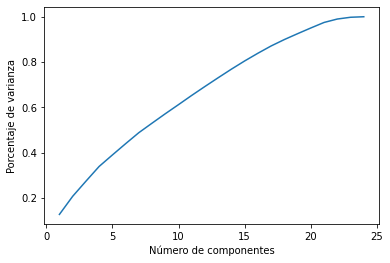

In [50]:
from sklearn.decomposition import PCA
wcss = []

for i in range(1, 25):
    pca = PCA(n_components = i,random_state = 0)
    pca.fit(data)
    wcss.append(pca.explained_variance_ratio_)

lst=[]
for i in range(len(wcss)):
    lst.append(sum(wcss[i]))
lst

plt.plot(range(1, 25), lst)
plt.xlabel('Número de componentes')
plt.ylabel('Porcentaje de varianza') 
plt.show()


In [74]:
pca = PCA(n_components = 15,random_state = 0)
data_pca=pca.fit_transform(data)

In [78]:
principal = pd.DataFrame(data=data_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])

In [81]:
principal.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.961619,-1.166538,-1.526240,-0.180557,-0.400195,0.894208,0.771550,-1.030972,0.354022,-0.137901,1.046658,-0.879620,-0.884384,0.554071,-1.047385
1,-0.143485,-0.940908,0.497237,-1.059638,0.088286,-0.882456,0.062581,-0.801456,0.452102,0.466314,-0.184461,-2.144616,-0.663692,-0.841785,-0.502623
2,-0.157045,-1.197652,0.339968,-1.249220,-1.624866,-0.582613,-0.805398,-1.329993,1.669932,1.411883,-0.564737,-0.303300,-0.925170,1.545457,-0.135200
3,-0.889961,-1.162342,-1.284279,-0.004849,-0.021497,0.263622,0.600536,-1.308328,0.697671,0.846283,-1.051581,0.415907,0.852844,0.571567,-0.712663
4,-0.138199,-1.370982,0.505107,-0.896975,-0.386809,-0.146304,-1.008534,-0.584316,1.399291,1.046998,-1.195610,0.515598,0.367822,2.205182,0.224340


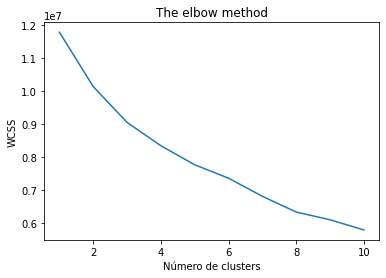

In [84]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(principal)
    wcss.append(kmeans.inertia_)
    
# Mostrando los resultados en un gráfico para determinar un codo 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # Suma de cuadrados dentro del cluster
plt.show()

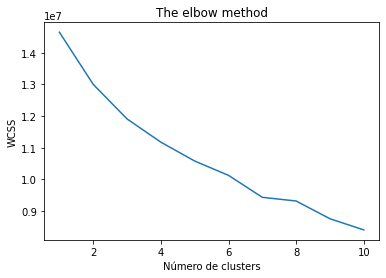

In [58]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
# Mostrando los resultados en un gráfico para determinar un codo 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # Suma de cuadrados dentro del cluster
plt.show()

Esocgemos 7

In [89]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)
y_kmeans

array([3, 3, 3, ..., 3, 3, 2])

In [95]:
kmeans_clusters=pd.DataFrame(y_kmeans)
print(kmeans_clusters.value_counts(ascending=True)) #kmeans

0     20816
1     22063
4     32239
2    225774
3    285148
dtype: int64


In [96]:
lista=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
wcss = []

for i in lista:
    dbscan = DBSCAN(eps = i)
    dbscan.fit(data)
    wcss.append(dbscan.n_features_in_)
    
# Mostrando los resultados en un gráfico para determinar un codo 'The elbow'
plt.plot(range(1, 9), wcss)
plt.xlabel('eps')
plt.ylabel('Número de clusters') # Suma de cuadrados dentro del cluster
plt.show()

In [9]:
dbscan=DBSCAN(eps=4.5,min_samples=10)
dbclusters=dbscan.fit_predict(data)
dbclusters

array([-1,  0,  0, ...,  1,  1, -1], dtype=int64)

In [ ]:
from sklearn.mixture import GaussianMixture
gaussian=GaussianMixture(n_components=4,random_state=0)
gaussianclusters=gaussian.fit_predict(data_df2)
gaussianclusters

In [ ]:
from sklearn.mixture import GaussianMixture
wcss = []

for i in range(1, 11):
    gaussian = GaussianMixture(n_components = i)
    gaussian.fit(data)
    wcss.append(gaussian.lower_bound_)
    
# Mostrando los resultados en un gráfico para determinar un codo 'The elbow'
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # Suma de cuadrados dentro del cluster
plt.show()

In [11]:
kmeans_clusters=pd.DataFrame(y_kmeans)
db_clusters=pd.DataFrame(dbclusters)
#ward_clusters=pd.DataFrame(wardclusters)
print(kmeans_clusters.value_counts(ascending=True)) #kmeans
print(db_clusters.value_counts(ascending=True)) #dbscan
#print(ward_clusters.value_counts(ascending=True)) #ward

1      8990
0    207381
dtype: int64
 59         4
 151        4
 156        5
 89         6
 221        6
        ...  
 2      14214
 4      16931
 0      35679
 1      57651
-1      66686
Length: 227, dtype: int64


In [13]:
data.shape

(216371, 25)

In [ ]:
default_params = {'quantile': .3,
                  'eps': .2,
                  'damping': .9,
                  'preference': -200,
                  'n_neighbors': 10,
                  'n_clusters': 3}
datasets = [('Standard Normal', data, {}),
            ('Various Normal', data, {'eps': .18, 'n_neighbors': 2}),
            ('Anisotropic Normal', data, {'eps': .15, 'n_neighbors': 2}),
            ('Uniform', data, {}),
            ('Circles', data, {'damping': .77, 'preference': -240,
                                        'quantile': .2, 'n_clusters': 2}),
            ('Moons', data, {'damping': .75,
                                    'preference': -220, 'n_clusters': 2})]
fig, axes = plt.subplots(figsize=(15, 15),
                         ncols=5,
                         nrows=len(data),
                         sharey=True,
                         sharex=True)

plt.setp(axes, xticks=[], yticks=[], xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))

for d, (dataset_label, dataset, algo_params) in enumerate(datasets):
    params = default_params.copy()
    params.update(algo_params)

    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'],
                                    include_self=False)
    connectivity = 0.5 * (connectivity + connectivity.T)

    kmeans = KMeans(n_clusters=params['n_clusters'])

    spectral = SpectralClustering(n_clusters=params['n_clusters'],
                                  eigen_solver='arpack',
                                  affinity='nearest_neighbors')

    dbscan = DBSCAN(eps=params['eps'])
    average_linkage = AgglomerativeClustering(linkage="average",
                                              affinity="cityblock",
                                              n_clusters=params['n_clusters'],
                                              connectivity=connectivity)

    gmm = GaussianMixture(n_components=params['n_clusters'],
                          covariance_type='full')

    clustering_algorithms = (('KMeans', kmeans),
                             ('SpectralClustering', spectral),
                             ('AgglomerativeClustering', average_linkage),
                             ('DBSCAN', dbscan),
                             ('GaussianMixture', gmm))

    for a, (name, algorithm) in enumerate(clustering_algorithms):

        if name == 'GaussianMixture':
            algorithm.fit(X)
            y_pred = algorithm.predict(X)
        else:
            y_pred = algorithm.fit_predict(X)

        axes[d, a].scatter(X[:, 0], 
                           X[:, 1], 
                           s=5, 
                           c=y_pred, 
                           cmap=cmap)
        
        if d == 0:
            axes[d, a].set_title(name, size=14)
        if a == 0:
            axes[d, a].set_ylabel(dataset_label, size=12)

        if y is None:
            y = [.5] * n_samples
        mi = adjusted_mutual_info_score(labels_pred=y_pred, 
                                        labels_true=y)
        axes[d, a].text(0.85, 0.91, 
                        f'MI: {mi:.2f}', 
                        transform=axes[d, a].transAxes, 
                        fontsize=12)
        axes[d, a].axes.get_xaxis().set_visible(False)

sns.despine()
fig.tight_layout()